# In class exercise...
* MI is biased in that small sample sizes lead to inaccurate estimates of PDFs, and that can sometimes lead to negative MI values (which should never happen in theory). 
* A common, and simple, approach, is to compute MI with shuffled condition labels (like randomization tests that we did many weeks back) and then subtract the shuffled MI from the actual MI. 

## Imports

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import sys
epsilon = sys.float_info.epsilon
# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## First set up two arrays of data (integers)...make them correlated to some degree so that there is a reasonably high MI...

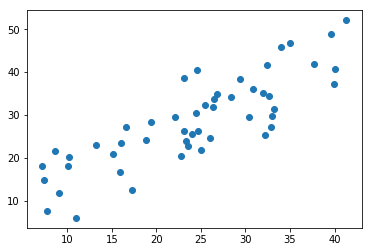

In [62]:
means = [25,30]
std = 10
corr = 0.8 # correlation
covs = [[std**2,std*std*corr],[std*std*corr,std**2]] 
N = 50
m = np.random.multivariate_normal(means, covs, N).T

x = m[0]
y = m[1]

plt.scatter(x,y)
plt.show()

## Then compute the MI between the arrays. Can do two discrete arrays for simplicity, and import the entropy and conditional entropy functions from the tutorial.

In [38]:
def entropy(x):
    """compute entropy of discrete array x

    Args:
        x (int): array of discrete values

    Returns:
        Hx (float): entropy of x

    """
    # figure out unique values of x - can be more than just 0s, 1s
    uniquex = np.unique(x)

    Hx = 0
    for i in np.arange(len(uniquex)):
        # probability that x==uniquex[i]
        px = np.sum(x==uniquex[i])/len(x)    

        # check for px==0 because log2(0) = -inf
        if px!=0:
            Hx += (-np.sum( px * np.log2(px+epsilon) ))  
        else:
            print('px is zero for value ', i)
        
    return Hx

In [39]:
def condEntropy(x,y):
    
    """
    conditional entropy, or the average entropy of x given each y, or Hxy
    1) For all Y {i=1:numel(X)}, compute the entropy of X given each Y
    2) Multiply H(X|Y==i) with the probability of each Y (i.e. pxi)
    3) Sum over all i

    Args:
        x (int): array of discrete values
        y (int): array of discrete values
        
    Returns:
        Hxy (float): average conditional entropy of x given y

    """

    Hxy=0
    uniquex = np.unique(x)
    uniquey = np.unique(y)

    # loop over unique elements of y
    for i in np.arange(len(uniquey)): 

        # probability that y==y(i) (prob of each y)
        py = np.sum(y==uniquey[i]) / N

        # then loop over all possible x's to compute entropy of x at each y
        tmp=0
        for j in np.arange(len(uniquex)):
            px_y = np.sum((x==uniquex[j]) & (y==uniquey[i])) / np.sum(y==uniquey[i])    # e.g. prob x==1 when y==0
            tmp += (-( px_y * np.log2(px_y+epsilon) ))                                     # entropy      

        # then tally up entropy of x given each specific y multiplied by the probability of that y (py)
        Hxy += py*tmp

    return Hxy

In [35]:
def binary_entropy(p): 
    # for binary values, entropy can be derived directly from the mean
    ent = -(p*np.log2(p+epsilon)+(1-p)*np.log2(1-p+epsilon)) 
    ent[np.isnan(ent)]=0
    return ent

In [53]:
Hx = entropy(x=x)
Hxy = condEntropy(x=x,y=y)
print('MI is: ', Hx-Hxy)

MI is:  9.96578428466


## Now repeat the above operations, but shuffle the data arrays and repeat the analysis many times (~500-1000 times). Plot the distribution of MI values that you get.

In [63]:
rep = 10
Hx_rand = np.zeros(rep)
Hxy_rand = np.zeros(rep)
x_rand = x.copy()
y_rand = y.copy()
for i in range(rep):
    np.random.shuffle(x_rand)
    print(x_rand[0])
    Hx_rand[i] = entropy(x=x_rand)
    Hxy_rand[i] = condEntropy(x=x_rand,y=y_rand)

22.0745002068
32.6424789184
24.4995701577
31.9800455017
29.4027368503
19.3973264829
16.6454319145
39.6579168229
33.0216453599
7.17312823953


In [65]:
# print(Hx_rand-Hxy_rand)
Hxy_rand

array([ -3.20342650e-16,  -3.20342650e-16,  -3.20342650e-16,
        -3.20342650e-16,  -3.20342650e-16,  -3.20342650e-16,
        -3.20342650e-16,  -3.20342650e-16,  -3.20342650e-16,
        -3.20342650e-16])

## Now subtract the mean of the shuffled MI values from your 'real' MI value...this will help correct for any bias that is introduced by a limited sample size

In [56]:
Hx-Hxy-(np.mean(Hx_rand-Hxy_rand))

0.0